In order to use this notebook you'll need these four libraries:

* numpy
* matplotlib
* python-igraph
* cairocffi

The first two can be easily installed using `pip`, and if you are using Anaconda they should be installed already. 
The third, python-igraph, can be a little more complicated, and you will need to install a separate library to support plotting 
graphs. The version of plotting library that I have found works well is cairocffi, which can be installed using the `pip` 
command, or `conda` in Anaconda. Note that this library works on Windows, but I have not tested in other environments.

In [68]:
from scipy.io import mmread
from scipy.stats import spearmanr
import numpy as np
import matplotlib.pyplot as plt
import igraph

## STEP 1: Enter a graph by read in the matrix from a .mtx file. Draw it and compute its eigenvalues.

The `mmread` function will read the matrix, but the type will be `coo_matrix` which is a sparse matrix representation. We'll need a dense representation (and anyway the matrix isn't too big).

In [69]:
m = mmread("soc-karate.mtx")
print(type(m))

<class 'scipy.sparse.coo.coo_matrix'>


In [70]:
md = m.todense()

In [71]:
print("Type after calling todense: ", type(md))
print("Size of matrix: ", md.shape)
n = md.shape[0]

Type after calling todense:  <class 'numpy.matrix'>
Size of matrix:  (34, 34)


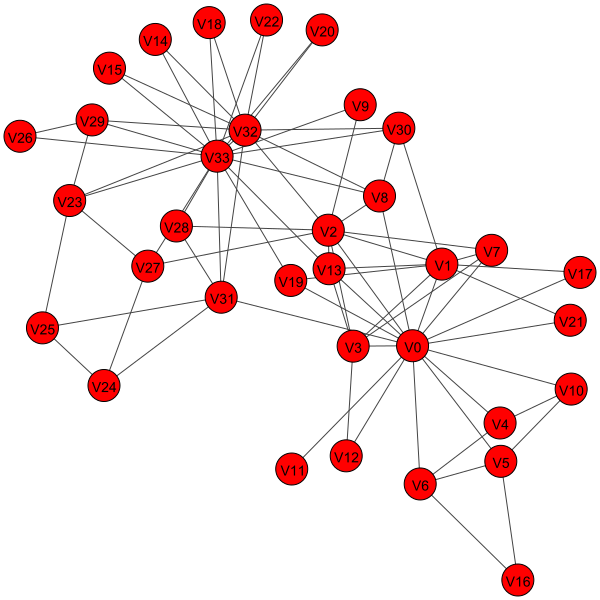

In [72]:
G = igraph.Graph.Adjacency(md > 0).as_undirected()
G.vs["label"] = [f"V{i}" for i in range(n)]

igraph.plot(G, vertex_size=32, bbox=(600, 600))

Compute the eigenvalues and eigenvectors using the function `np.linalg.eig` Take the real part of each eigenvalue. The eigenvalues are all real because the matrix is an adjacency matrix, but the numpy routine returns complex values, and some will have small complex parts due to rounding errors. Finally, sort the eigenvalues in descending order. The code `w[::-1].sort()` does this, because `w[::-1]` represents a reversed "view" of `w` (see [this explanation](https://www.adamsmith.haus/python/answers/how-to-sort-a-numpy-array-in-descending-order-in-python#:~:text=Use%20numpy.,%2D1%5D%20to%20reverse%20array%20.)).

In [73]:
ww, vv = np.linalg.eig(md)
maxval = max(ww)
maxind = np.nonzero(ww == maxval)
vv0 = np.array(np.real(vv[:, maxind])).reshape(-1)
ww = np.real(ww)
ww[::-1].sort()
print("Eigenvalues of G are:")
print(np.around(ww, 2))

Eigenvalues of G are:
[ 6.73  4.98  2.92  2.31  1.49  1.45  1.08  1.03  0.83  0.62  0.42  0.3
  0.    0.    0.    0.    0.   -0.   -0.   -0.   -0.   -0.   -0.42 -0.79
 -1.04 -1.19 -1.44 -1.69 -2.   -2.09 -2.44 -3.11 -3.45 -4.49]


## Step 2: Compute the deck of vertex-deletions G-v and for each vertex-deletion compute the vector of eigenvalues.

For each  0≤𝑖<𝑛 :

Use the numpy.delete method to remove the  𝑖𝑡ℎ  row and column of the matrix. This method can delete rows or columns, but not both at the same time, so we will call it twice: once to delete the  𝑖𝑡ℎ  row and again to delete the  𝑖𝑡ℎ  column.
Use numpy.linalg.eig to compute the eigenvalues of the new matrix.
Take the real part of each of the eigenvalues.
Take the absolute value of each of the eigenvalues.
Sort the eigenvalues in descending order.
Put each vector of eigenvalues into a list.

In [74]:
edge_del_deck_eigenvalues = list()
for i in range(n):
    rd = np.delete(md, i, 0)
    cd = np.delete(rd, i, 1)
    w, v = np.linalg.eig(cd)
    w = np.real(w)
    w[::-1].sort()
    edge_del_deck_eigenvalues.append(w)

In [75]:
[np.around(edge_del_deck_eigenvalues[i], 2) for i in range(5)]

[array([ 6.16,  3.78,  2.48,  2.3 ,  1.46,  1.35,  1.08,  0.95,  0.69,
         0.61,  0.4 ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  , -0.  ,
        -0.  , -0.  , -0.  , -0.  , -0.61, -0.82, -1.17, -1.25, -1.47,
        -1.71, -2.  , -2.09, -2.49, -3.38, -4.26]),
 array([ 6.34,  4.52,  2.65,  2.3 ,  1.45,  1.31,  1.08,  0.88,  0.64,
         0.57,  0.34,  0.  ,  0.  ,  0.  ,  0.  ,  0.  , -0.  , -0.  ,
        -0.  , -0.  , -0.  , -0.  , -0.56, -0.88, -1.11, -1.3 , -1.45,
        -1.7 , -2.  , -2.09, -3.11, -3.43, -4.44]),
 array([ 6.09,  4.85,  2.71,  2.29,  1.45,  1.1 ,  1.05,  0.91,  0.66,
         0.58,  0.33,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  , -0.  , -0.  , -0.  , -0.56, -0.83, -1.14, -1.41, -1.63,
        -2.  , -2.03, -2.26, -2.55, -3.14, -4.49]),
 array([ 6.47,  4.6 ,  2.71,  2.3 ,  1.48,  1.39,  1.08,  0.9 ,  0.62,
         0.56,  0.38,  0.  ,  0.  ,  0.  ,  0.  ,  0.  , -0.  , -0.  ,
        -0.  , -0.  , -0.  , -0.  , -0.47, -0.79, -1.04, -1.19,

## Step 3: Plot the eigenvalues of the vertex deletions on the same axes, just to get an idea of how they look

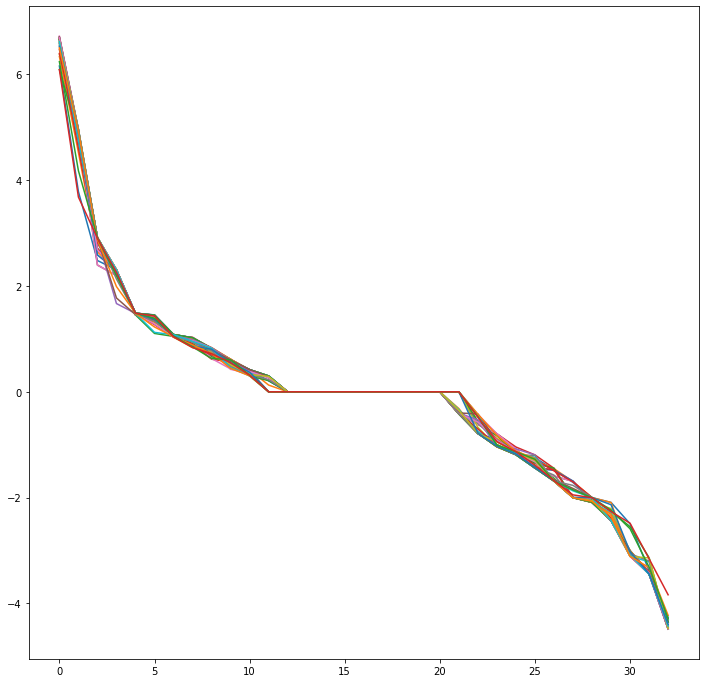

In [76]:
fig, ax = plt.subplots(figsize=(12, 12))
X = list(range(n - 1))
for i in range(n):
    ax.plot(X, edge_del_deck_eigenvalues[i])
plt.show()

## Step 4: Rank vertex v based on the largest eigenvalue of $G$, minus the largest eigenvalue of $G-v$. (calling this Spread Centrality)

### Eigenvalues of $G-v$

In [77]:
largest_eigenvalues = np.asarray([edge_del_deck_eigenvalues[i][0] for i in range(n)]).reshape(-1)
sorted_largest_eigenvalues = sorted([(i, largest_eigenvalues[i]) for i in range(n)], key=lambda t: -t[1])
for i in range(n):
    ix, le = sorted_largest_eigenvalues[i]
    label = f"v{ix}"
    print(f"{label:3s} {le:8.4f}")

v16   6.7222
v11   6.7073
v24   6.7053
v25   6.7038
v10   6.6902
v4    6.6902
v26   6.6892
v5    6.6881
v6    6.6881
v12   6.6803
v17   6.6710
v21   6.6710
v14   6.6598
v15   6.6598
v22   6.6598
v18   6.6598
v20   6.6598
v9    6.6563
v29   6.6166
v28   6.6140
v27   6.6133
v23   6.5931
v19   6.5814
v7    6.5486
v30   6.5281
v31   6.4985
v3    6.4706
v13   6.3939
v8    6.3795
v1    6.3367
v32   6.2402
v0    6.1572
v2    6.0917
v33   6.0880


In [78]:
spread_scores = np.asarray([ww[0] - edge_del_deck_eigenvalues[i][0] for i in range(n)]).reshape(-1)

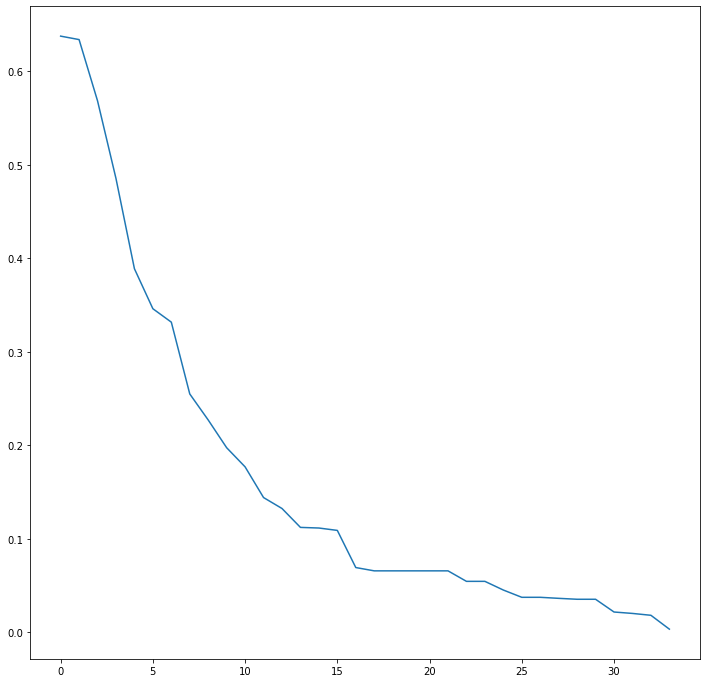

In [79]:
fig, ax = plt.subplots(figsize=(12, 12))
ax.plot(list(range(34)), sorted(spread_scores, key=lambda x: -x))
plt.show()

### Spread centralities

In [80]:
pairs = [(i, spread_scores[i]) for i in range(n)]
sorted_spread_scores = sorted(pairs, key = lambda x: -x[1])
prev = 0
for i in range(n):
    score = sorted_spread_scores[i][1]
    ix = sorted_spread_scores[i][0]
    label = f"v{ix}"
    print(f"{label:3s} {score:8.4f}")

v33   0.6377
v2    0.6340
v0    0.5685
v32   0.4855
v1    0.3890
v8    0.3462
v13   0.3318
v3    0.2551
v31   0.2272
v30   0.1975
v7    0.1771
v19   0.1443
v23   0.1326
v27   0.1124
v28   0.1117
v29   0.1091
v9    0.0694
v20   0.0659
v18   0.0659
v14   0.0659
v15   0.0659
v22   0.0659
v21   0.0547
v17   0.0547
v12   0.0454
v5    0.0376
v6    0.0376
v26   0.0365
v4    0.0355
v10   0.0355
v25   0.0219
v24   0.0204
v11   0.0184
v16   0.0035


### Step 4a: List the largest eigenvalues of $G-v$ for each vertex $v$

## Step 5: Heat map of vertices by impact on largest eigenvalue

Score each vertex by the difference between the largest eigenvalue of the original graph, and the largest eigenvalue of the graph with that vertex removed. Plot the graph with vertices colored according to score - vertices with lower scores are colored blue and vertices with higher scores are colored red.

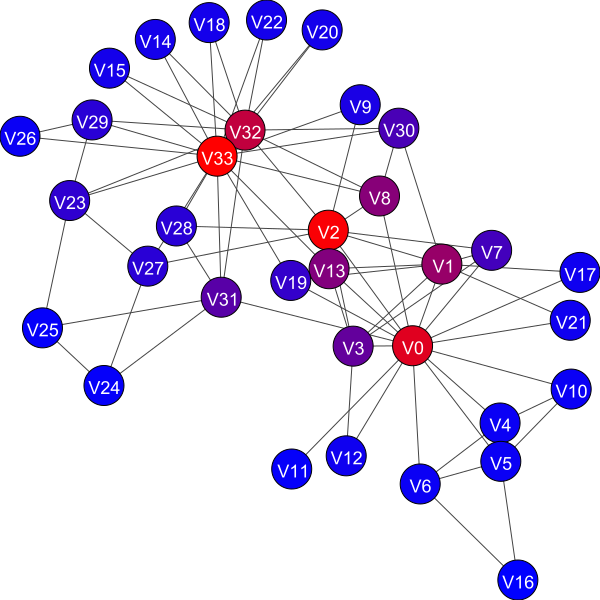

In [81]:
ncol = 50
p = igraph.drawing.colors.GradientPalette("blue", "red", ncol)
min_score = min(spread_scores)
max_score = max(spread_scores)
rel_scores = [int((ncol - 1) * (score - min_score) / (max_score - min_score)) for score in spread_scores]
igraph.plot(G, bbox=(600, 600), vertex_color=p.get_many(rel_scores), vertex_size=40, vertex_label_color="white", vertex_label_size=18)


## Step 6: Heatmap of eigenvector centrality scores for comparison

Plot the graph with vertices colored closer to blue or red according to the size of the corresponding entry in the eigenvector corresponding to the largest eigenvalue for the graph's adjacency matrix.

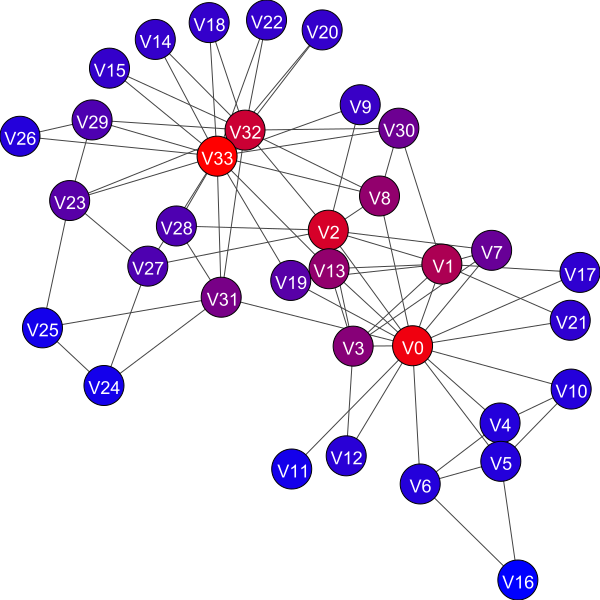

In [82]:
ncol = 50
eig_scores = vv0
p = igraph.drawing.colors.GradientPalette("blue", "red", ncol)
min_score = min(eig_scores)
max_score = max(eig_scores)
rel_scores = [int((ncol - 1) * (score - min_score) / (max_score - min_score)) for score in eig_scores]
eig_scores = np.reshape(np.asarray(eig_scores), -1)
igraph.plot(G,bbox=(600, 600), vertex_color=p.get_many(rel_scores), vertex_size=40, vertex_label_color="white", vertex_label_size=18)


Average degree and correlation coefficient of eigenvalue centralities with spread centrality

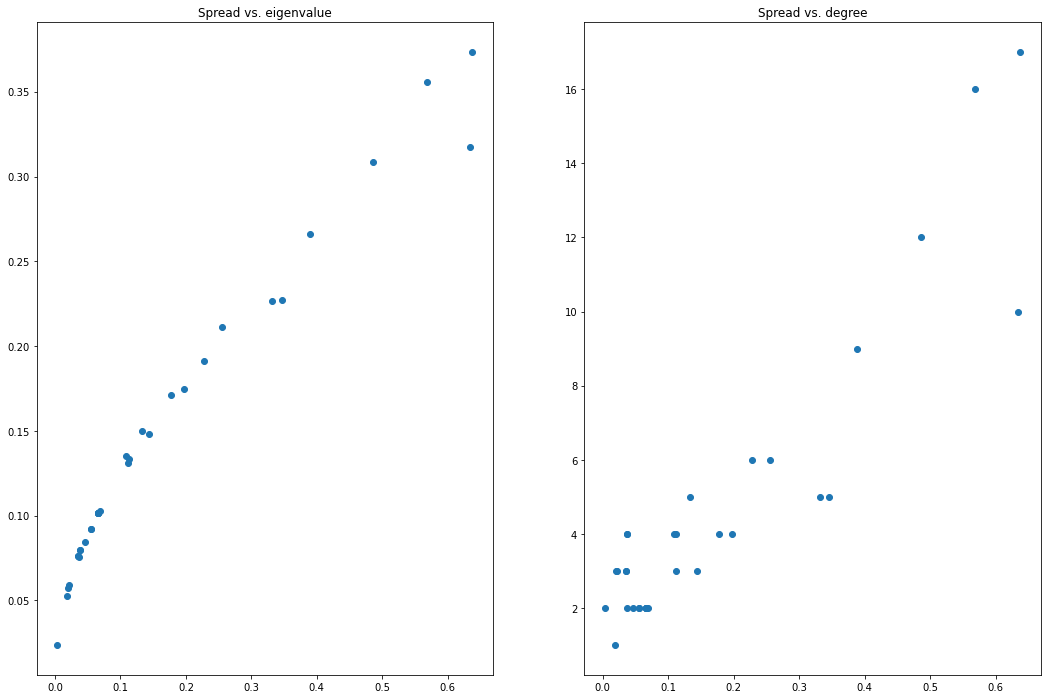

In [83]:
fig, ax = plt.subplots(1, 2, figsize=(18, 12))
ax[0].scatter(spread_scores, eig_scores)
ax[0].set_title("Spread vs. eigenvalue")
ax[1].scatter(spread_scores, G.degree())
ax[1].set_title("Spread vs. degree")
plt.show()

In [84]:
print(f"Average degree: {np.mean(G.degree())}")
print(f"Correlation with eigenvalue centrality: {np.corrcoef(spread_scores, eig_scores)[0, 1]}")
print(f"Ranked correlation: {spearmanr(spread_scores, eig_scores)}")
deg_scores = np.asarray(G.degree()).reshape(-1)
print(f"Correlation with degree: {np.corrcoef(spread_scores, deg_scores)[0, 1]}")
print(f"Ranked correlation: {spearmanr(spread_scores, deg_scores)}")

Average degree: 4.588235294117647
Correlation with eigenvalue centrality: 0.982779933783986
Ranked correlation: SpearmanrResult(correlation=0.9960966867185655, pvalue=2.590661567870592e-35)
Correlation with degree: 0.9188319186663478
Ranked correlation: SpearmanrResult(correlation=0.7643872883594446, pvalue=1.4277792647345455e-07)


## Step 7: Heat map of betweenness centrality scores

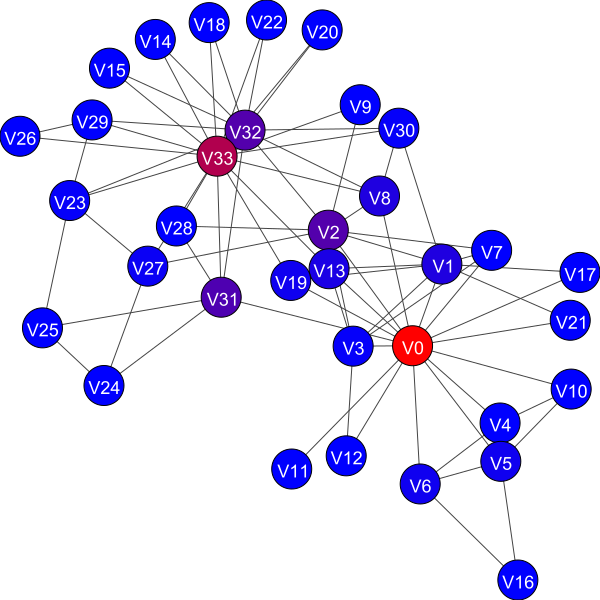

In [85]:
ncol = 50
btw_scores = np.asarray(G.betweenness()).reshape(-1)
p = igraph.drawing.colors.GradientPalette("blue", "red", ncol)
min_score = min(btw_scores)
max_score = max(btw_scores)
if max_score == min_score:
    rel_scores = [int(ncol / 2)] * n
else:
    rel_scores = [int((ncol - 1) * (score - min_score) / (max_score - min_score)) for score in btw_scores]
igraph.plot(G, vertex_size=40, bbox=(600, 600), vertex_color=p.get_many(rel_scores), vertex_label_color="white", vertex_label_size=18)

Average betweenness and correlation with spread centralities

In [86]:
print(f"Average betweenness: {np.mean(G.betweenness())}")
print(f"Correlation: {np.corrcoef(spread_scores, btw_scores)[0, 1]}")
print(f"Ranked correlation: {spearmanr(spread_scores, btw_scores)}")

Average betweenness: 23.235294117647058
Correlation: 0.8096750532765832
Ranked correlation: SpearmanrResult(correlation=0.689806486501962, pvalue=6.391852612190087e-06)


## Step 9: Closeness

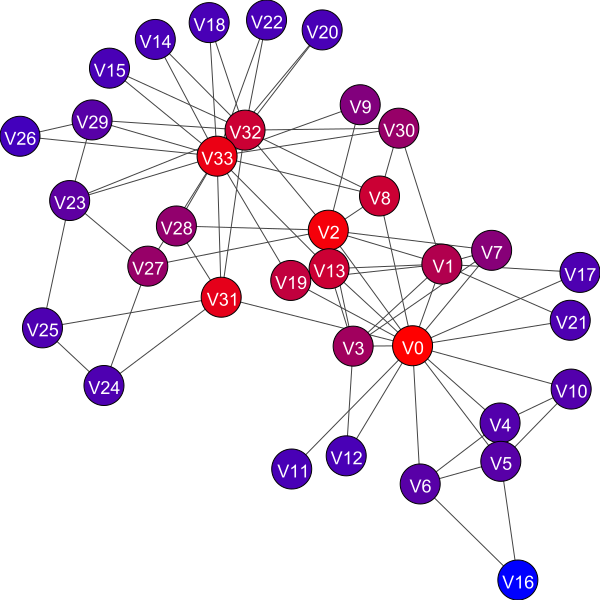

In [87]:
ncol = 50
cls_scores = (1 / (n - 1)) * np.asarray(G.closeness()).reshape(-1)
p = igraph.drawing.colors.GradientPalette("blue", "red", ncol)
min_score = min(cls_scores)
max_score = max(cls_scores)
if max_score == min_score:
    rel_scores = [int(ncol / 2)] * n
else:
    rel_scores = [int((ncol - 1) * (score - min_score) / (max_score - min_score)) for score in cls_scores]
igraph.plot(G, vertex_size=40, bbox=(600, 600), vertex_color=p.get_many(rel_scores), vertex_label_color="white", vertex_label_size=18)

Average closeness and correlation with spread scores

In [88]:
print(f"Average closeness: {np.mean(G.closeness())}")
print(f"Correlation: {np.corrcoef(spread_scores, cls_scores)[0, 1]}")
print(f"Ranked correlation: {spearmanr(spread_scores, cls_scores)}")

Average closeness: 0.4264796325735234
Correlation: 0.8803031410360699
Ranked correlation: SpearmanrResult(correlation=0.8532679859095383, pvalue=1.4509177903024747e-10)


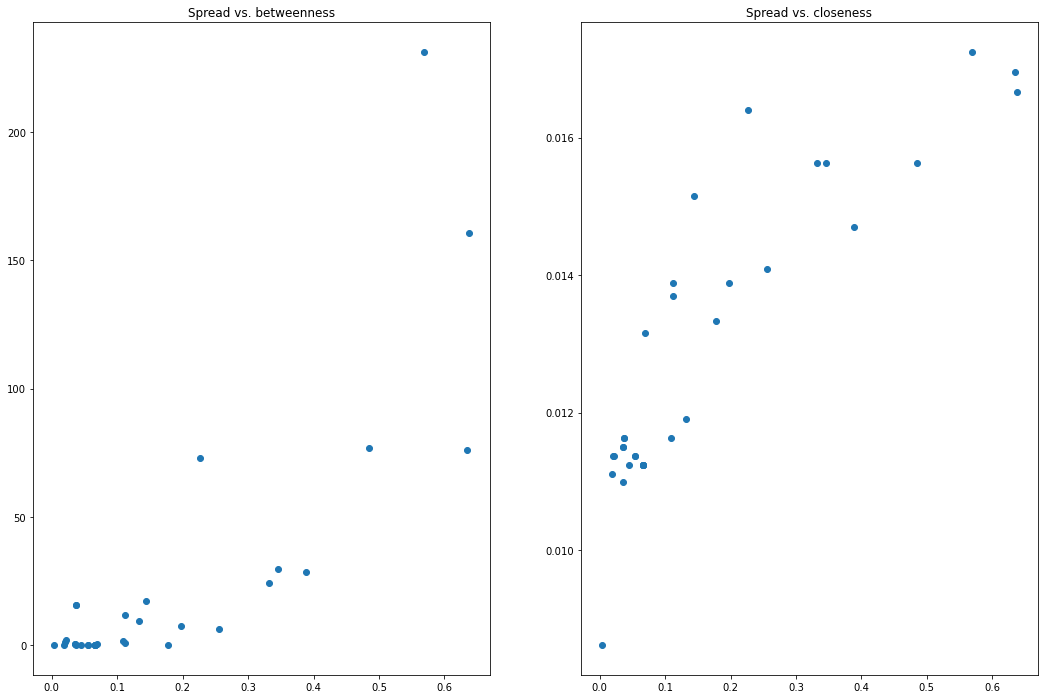

In [89]:
fig, ax = plt.subplots(1, 2, figsize=(18, 12))
ax[0].scatter(spread_scores, btw_scores)
ax[0].set_title("Spread vs. betweenness")
ax[1].scatter(spread_scores, cls_scores)
ax[1].set_title("Spread vs. closeness")
plt.show()

## Step 10: Remove the vertices with the highest $T$ spread scores, get the largest eigenvalue 

We selected $T=2$ at first to remove by inspection of the plot of spread scores in descending order above, which has its first steep drop after the first two scores, for vertices 33 and 2.

In [90]:
TO_REMOVE = 10
pairs = sorted([(i, spread_scores[i]) for i in range(len(spread_scores))], key=lambda t: -t[1])
top_inds = [t[0] for t in pairs[:TO_REMOVE]]
print("Vertices with top two spread scores: ", top_inds)
AR = np.delete(md, top_inds, 0)
AR = np.delete(AR, top_inds, 1)
wR, vR = np.linalg.eig(AR)
wR = np.real(wR)
wR[::-1].sort()

print("Largest eigenvalue of adjacency matrix after removing vertices with top", TO_REMOVE, "spread scores:", wR[0])


Vertices with top two spread scores:  [33, 2, 0, 32, 1, 8, 13, 3, 31, 30]
Largest eigenvalue of adjacency matrix after removing vertices with top 10 spread scores: 2.4811943040920155


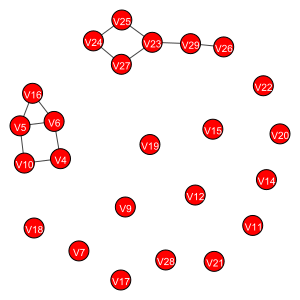

In [91]:
Gd = igraph.Graph.Adjacency(AR > 0, mode="undirected")
Gd.vs["label"] = [f"V{i}" for i in range(n) if i not in top_inds]
igraph.plot(Gd, bbox=(300, 300), vertex_label_color="white", vertex_label_size=10)

## Step 11: Remove the vertex with the highest spread score. Then recompute spread scores and repeat


In [92]:
def largest_eigenvalue(adj):
    wwG, vvG = np.linalg.eig(adj)
    wwG = np.real(wwG)
    wwG[::-1].sort()
    G_largest_eig = wwG[0]
    return G_largest_eig

def compute_spread_scores(adj, le):
    nG = adj.shape[0]
    scores = list()
    for i in range(nG):
        adj_del = np.delete(adj, i, 0)
        adj_del = np.delete(adj_del, i, 1)
        del_largest = largest_eigenvalue(adj_del)
        scores.append(le - del_largest)
    return np.asarray(scores).reshape(-1)
    

In [93]:
adj = md.copy()
names = [f"V{i:d}" for i in range(n)]
for i in range(TO_REMOVE):
    le = largest_eigenvalue(adj)
    ss = compute_spread_scores(adj, le)
    mv = max(ss)
    mw = sorted(np.nonzero(ss == mv)[0], key=lambda x: -x)
    print(f"Step {i:2d}, largest eigenvalue {le:6.4f}, largest spread score {mv:6.4f}, removing {', '.join(names[j] for j in mw)}")
    for v in mw:
        del names[v]
    adj = np.delete(adj, mw, 0)
    adj = np.delete(adj, mw, 1)
le = largest_eigenvalue(adj)
print(f"Done,    largest eigenvalue {le:6.4f}")

Step  0, largest eigenvalue 6.7257, largest spread score 0.6377, removing V33
Step  1, largest eigenvalue 6.0880, largest spread score 1.4660, removing V0
Step  2, largest eigenvalue 4.6220, largest spread score 0.9278, removing V2
Step  3, largest eigenvalue 3.6942, largest spread score 0.5417, removing V32
Step  4, largest eigenvalue 3.1525, largest spread score 0.5336, removing V1
Step  5, largest eigenvalue 2.6189, largest spread score 0.1378, removing V23
Step  6, largest eigenvalue 2.4812, largest spread score 0.1784, removing V6
Step  7, largest eigenvalue 2.3028, largest spread score 0.5707, removing V31, V25, V24
Step  8, largest eigenvalue 1.7321, largest spread score 0.1140, removing V13, V12
Step  9, largest eigenvalue 1.6180, largest spread score 0.6180, removing V10, V5
Done,    largest eigenvalue 1.0000


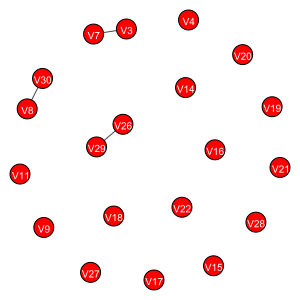

In [94]:
Gd = igraph.Graph.Adjacency(adj > 0, mode="undirected")
Gd.vs["label"] = names[:]
igraph.plot(Gd, bbox=(300, 300), vertex_label_color="white", vertex_label_size=10)

## Step 12: Remove the vertex with the highest degree repeatedly until there are no edges left

In [95]:
adj = md.copy()
names = [f"V{i}" for i in range(n)]
s = np.sum(adj)
i = 0
while s > 0:
    degs = np.array(np.sum(adj, axis=0)).reshape(-1)
    maxdeg = max(degs)
    mw = sorted(np.nonzero(degs == maxdeg)[0], key=lambda x : -x)
    print(f"i={i:2d}, Max degree = {maxdeg}, removing {', '.join(names[j] for j in mw)}")
    for j in mw:
        del names[j]
    adj = np.delete(adj, mw, 0)
    adj = np.delete(adj, mw, 1)
    s = np.sum(adj)
    i += 1
print(f"Done after {i} steps")

i= 0, Max degree = 17.0, removing V33
i= 1, Max degree = 16.0, removing V0
i= 2, Max degree = 11.0, removing V32
i= 3, Max degree = 8.0, removing V2, V1
i= 4, Max degree = 3.0, removing V31, V25, V24, V23, V6, V5, V3
i= 5, Max degree = 1.0, removing V30, V29, V26, V10, V8, V4
Done after 6 steps


In [96]:
print("Vertex  Spread  Degree   Betweenness   Closeness   Eigenvector")
for i in range(n):
    label = f"V{i}"
    print(f"  {label:3s} {spread_scores[i]:8.4f} {deg_scores[i]:8.4f} {btw_scores[i]:8.4f}      {cls_scores[i]:8.4f}     {eig_scores[i]:8.4f}")


Vertex  Spread  Degree   Betweenness   Closeness   Eigenvector
  V0    0.5685  16.0000 231.0714        0.0172       0.3555
  V1    0.3890   9.0000  28.4786        0.0147       0.2660
  V2    0.6340  10.0000  75.8508        0.0169       0.3172
  V3    0.2551   6.0000   6.2881        0.0141       0.2112
  V4    0.0355   3.0000   0.3333        0.0115       0.0760
  V5    0.0376   4.0000  15.8333        0.0116       0.0795
  V6    0.0376   4.0000  15.8333        0.0116       0.0795
  V7    0.1771   4.0000   0.0000        0.0133       0.1710
  V8    0.3462   5.0000  29.5294        0.0156       0.2274
  V9    0.0694   2.0000   0.4476        0.0132       0.1027
  V10   0.0355   3.0000   0.3333        0.0115       0.0760
  V11   0.0184   1.0000   0.0000        0.0111       0.0529
  V12   0.0454   2.0000   0.0000        0.0112       0.0843
  V13   0.3318   5.0000  24.2159        0.0156       0.2265
  V14   0.0659   2.0000   0.0000        0.0112       0.1014
  V15   0.0659   2.0000   0.0000     